# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Muhammad Lutfi Amin Ghifarullah
- Email: ghifarullah11@gmail.com
- Id Dicoding: Muhammad Lutfi Amin Ghifarullah

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import resample, shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
import joblib

### Menyiapkan data yang akan diguankan

## Data Understanding

In [2]:
df = pd.read_csv('data/data.csv')

In [3]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [5]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [6]:
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [7]:
df.duplicated().sum()

0

In [8]:
# categorical_columns = [
#     'Marital_status',
#     'Application_mode',
#     'Course',
#     'Daytime_evening_attendance',
#     'Previous_qualification',
#     'Nacionality',
#     'Mothers_qualification',
#     'Fathers_qualification',
#     'Mothers_occupation',
#     'Fathers_occupation',
#     'Displaced',
#     'Educational_special_needs',
#     'Debtor',
#     'Tuition_fees_up_to_date',
#     'Gender',
#     'Scholarship_holder',
#     'International'
# ]

# numerical_columns = [
#     'Application_order',
#     'Previous_qualification_grade',
#     'Admission_grade',
#     'Age_at_enrollment',
#     "Curricular_units_1st_sem_credited",
#     "Curricular_units_1st_sem_enrolled",
#     "Curricular_units_1st_sem_evaluations",          
#     "Curricular_units_1st_sem_approved",
#     "Curricular_units_1st_sem_grade",
#     "Curricular_units_1st_sem_without_evaluations",   
#     "Curricular_units_2nd_sem_credited",
#     "Curricular_units_2nd_sem_enrolled",
#     "Curricular_units_2nd_sem_evaluations",           
#     "Curricular_units_2nd_sem_approved",
#     "Curricular_units_2nd_sem_grade",
#     "Curricular_units_2nd_sem_without_evaluations",  
#     "Unemployment_rate",
#     "Inflation_rate",
#     "GDP"
# ]

In [9]:
# df['Marital_status'] = df['Marital_status'].map({
#     1: 'Single',
#     2: 'Married',
#     3: 'Widower',
#     4: 'Divorced',
#     5: 'Facto union',
#     6: 'Legally separated'
# })
# df['Application_mode'] = df['Application_mode'].map({
#     1: '1st phase - general contingent',
#     2: 'Ordinance No. 612/93 5',
#     5: '1st phase - special contingent (Azores Island)',
#     7: 'Holders of other higher couses',
#     10: 'Ordinance No. 854-B/99',
#     15: 'International student (bachelor)',
#     16: '1st phase - special contingent (Madeira Island)',
#     17: '2nd phase - general contingent',
#     18: '3rd phase - general contingent',
#     26: 'Ordinance No. 533-A/99, item b2 (Different Plan)',
#     27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
#     39: 'Over 23 years old',
#     42: 'Transfer',
#     43: 'Change of course',
#     44: 'Technological specialization diploma holders',
#     51: 'Change of institution/course',
#     53: 'Short cycle diploma holders',
#     57: 'Change of institution/course (International)'
# })
# df['Course'] = df['Course'].map({
#     33: 'Biofuel Production Technologies',
#     171: 'Animation and Multimedia Design',
#     8014: 'Social Service (evening attendance)',
#     9003: 'Agronomy',
#     9070: 'Communication Design',
#     9085: 'Veterinary Nursing',
#     9119: 'Informatics Engineering',
#     9130: 'Equinculture',
#     9147: 'Management',
#     9238: 'Social Service',
#     9254: 'Tourism',
#     9500: 'Nursing',
#     9556: 'Oral Hygiene',
#     9670: 'Advertising and Marketing Management',
#     9773: 'Journalism and Communication',
#     9853: 'Basic Education',
#     9991: 'Management (evening attendance)'
# })
# df['Daytime_evening_attendance'] = df['Daytime_evening_attendance'].map({
#     1: 'Daytime',
#     0: 'Evening'
# })
# df['Previous_qualification'] = df['Previous_qualification'].map({
#     1: "Secondary education", 
#     2: "bachelor\'s degree ",
#     3: "degree ",
#     4: "master\'s", 
#     5: "doctorate",
#     6: "Frequency of higher education", 
#     9: "12th year of schooling (not completed)",
#     10: "11th year of schooling (not completed)",
#     12: "Other - 11th year of schooling ",
#     14: "10th year of schooling",
#     15: "10th year of schooling (not completed)",
#     19: "Basic education 3rd cycle (9th/10th/11th year) or equiv.",
#     38: "Basic education 2nd cycle (6th/7th/8th year) or equiv.",
#     39: "Technological specialization course ",
#     40: "Higher education - degree (1st cycle)",
#     42: "Professional higher technical course",
#     43: "Higher education - master (2nd cycle)",
# })
# df['Nacionality'] = df['Nacionality'].map({
#     1: 'Portuguese', 
#     2: 'German', 
#     6: 'Spanish', 
#     11: 'Italian', 
#     13: 'Dutch', 
#     14: 'English', 
#     17: 'Lithuanian', 
#     21: 'Angolan', 
#     22: 'Cape Verdean', 
#     24: 'Guinean', 
#     25: 'Mozambican', 
#     26: 'Santomean', 
#     32: 'Turkish', 
#     41: 'Brazilian', 
#     62: 'Romanian', 
#     100: 'Moldova (Republic of)', 
#     101: 'Mexican', 
#     103: 'Ukrainian', 
#     105: 'Russian', 
#     108: 'Cuban', 
#     109: 'Colombian',
# })
# df['Mothers_qualification'] = df['Mothers_qualification'].map({
#     1: "Secondary Education - 12th Year of Schooling or Eq.",
#     2: "Higher Education - Bachelor's Degree",
#     3: "Higher Education - Degree",
#     4: "Higher Education - Master's",
#     5: "Higher Education - Doctorate",
#     6: "Frequency of Higher Education",
#     9: "12th Year of Schooling - Not Completed",
#     10: "11th Year of Schooling - Not Completed",
#     11: "7th Year (Old)",
#     12: "Other - 11th Year of Schooling",
#     14: "10th Year of Schooling",
#     18: "General commerce course",
#     19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
#     22: "Technical-professional course",
#     26: "7th year of schooling",
#     27: "2nd cycle of the general high school course",
#     29: "9th Year of Schooling - Not Completed",
#     30: "8th year of schooling",
#     34: "Unknown",
#     35: "Can't read or write",
#     36: "Can read without having a 4th year of schooling",
#     37: "Basic education 1st cycle (4th/5th year) or equiv.",
#     38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
#     39: "Technological specialization course",
#     40: "Higher education - degree (1st cycle)",
#     41: "Specialized higher studies course",
#     42: "Professional higher technical course",
#     43: "Higher Education - Master (2nd cycle)",
#     44: "Higher Education - Doctorate (3rd cycle)"
# })
# df['Fathers_qualification'] = df['Fathers_qualification'].map({
#     1: "Secondary Education - 12th Year of Schooling or Eq.", 
#     2: "Higher Education - Bachelor's Degree",
#     3: "Higher Education - Degree",
#     4: "Higher Education - Master's",
#     5: "Higher Education - Doctorate",
#     6: "Frequency of Higher Education",
#     9: "12th Year of Schooling - Not Completed",
#     10: "11th Year of Schooling - Not Completed",
#     11: "7th Year (Old)",
#     12: "Other - 11th Year of Schooling",
#     13: "2nd year complementary high school course",
#     14: "10th Year of Schooling",
#     18: "General commerce course",
#     19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
#     20: "Complementary High School Course",
#     22: "Technical-professional course",
#     25: "Complementary High School Course - not concluded",
#     26: "7th year of schooling",
#     27: "2nd cycle of the general high school course",
#     29: "9th Year of Schooling - Not Completed",
#     30: "8th year of schooling",
#     31: "General Course of Administration and Commerce",
#     33: "Supplementary Accounting and Administration",
#     34: "Unknown",
#     35: "Can't read or write",
#     36: "Can read without having a 4th year of schooling",
#     37: "Basic education 1st cycle (4th/5th year) or equiv.",
#     38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
#     39: "Technological specialization course",
#     40: "Higher education - degree (1st cycle)",
#     41: "Specialized higher studies course",
#     42: "Professional higher technical course",
#     43: "Higher Education - Master (2nd cycle)",
#     44: "Higher Education - Doctorate (3rd cycle)"
# })
# df['Mothers_occupation'] = df['Mothers_occupation'].map({
#     0: 'Student',
#     1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
#     2: 'Specialists in Intellectual and Scientific Activities',
#     3: 'Intermediate Level Technicians and Professions',
#     4: 'Administrative staff',
#     5: 'Personal Services, Security and Safety Workers and Sellers',
#     6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
#     7: 'Skilled Workers in Industry, Construction and Craftsmen',
#     8: 'Installation and Machine Operators and Assembly Workers',
#     9: 'Unskilled Workers',
#     10: 'Armed Forces Professions',
#     90: 'Other Situation',
#     99: '(blank)',
#     122: 'Health professionals',
#     123: 'teachers',
#     125: 'Specialists in information and communication technologies (ICT)',
#     131: 'Intermediate level science and engineering technicians and professions',
#     132: 'Technicians and professionals, of intermediate level of health',
#     134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
#     141: 'Office workers, secretaries in general and data processing operators',
#     143: 'Data, accounting, statistical, financial services and registry-related operators',
#     144: 'Other administrative support staff',
#     151: 'personal service workers',
#     152: 'sellers',
#     153: 'Personal care workers and the like',
#     171: 'Skilled construction workers and the like, except electricians',
#     173: 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like',
#     175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
#     191: 'cleaning workers',
#     192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
#     193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
#     194: 'Meal preparation assistants'
# })
# df['Fathers_occupation'] = df['Fathers_occupation'].map({
#     0: 'Student',
#     1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
#     2: 'Specialists in Intellectual and Scientific Activities',
#     3: 'Intermediate Level Technicians and Professions',
#     4: 'Administrative staff',
#     5: 'Personal Services, Security and Safety Workers and Sellers',
#     6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
#     7: 'Skilled Workers in Industry, Construction and Craftsmen',
#     8: 'Installation and Machine Operators and Assembly Workers',
#     9: 'Unskilled Workers',
#     10: 'Armed Forces Professions',
#     90: 'Other Situation',
#     99: '(blank)',
#     101: 'Armed Forces Officers',
#     102: 'Armed Forces Sergeants',
#     103: 'Other Armed Forces personnel',
#     112: 'Directors of administrative and commercial services',
#     114: 'Hotel, catering, trade and other services directors',
#     121: 'Specialists in the physical sciences, mathematics, engineering and related techniques',
#     122: 'Health professionals',
#     123: 'teachers',
#     124: 'Specialists in finance, accounting, administrative organization, public and commercial relations',
#     131: 'Intermediate level science and engineering technicians and professions',
#     132: 'Technicians and professionals, of intermediate level of health',
#     134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
#     135: 'Information and communication technology technicians',
#     141: 'Office workers, secretaries in general and data processing operators',
#     143: 'Data, accounting, statistical, financial services and registry-related operators',
#     144: 'Other administrative support staff',
#     151: 'personal service workers',
#     152: 'sellers',
#     153: 'Personal care workers and the like',
#     154: 'Protection and security services personnel',
#     161: 'Market-oriented farmers and skilled agricultural and animal production workers',
#     163: 'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence',
#     171: 'Skilled construction workers and the like, except electricians',
#     172: 'Skilled workers in metallurgy, metalworking and similar',
#     174: 'Skilled workers in electricity and electronics',
#     175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
#     181: 'Fixed plant and machine operators',
#     182: 'assembly workers',
#     183: 'Vehicle drivers and mobile equipment operators',
#     192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
#     193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
#     194: 'Meal preparation assistants',
#     195: 'Street vendors (except food) and street service providers'
# })
# df['Displaced'] = df['Displaced'].map({
#     0: 'No',
#     1: 'Yes'
# })
# df['Educational_special_needs'] = df['Educational_special_needs'].map({
#     0: 'No',
#     1: 'Yes'
# })
# df['Debtor'] = df['Debtor'].map({
#     0: 'No',
#     1: 'Yes'
# })
# df['Tuition_fees_up_to_date'] = df['Tuition_fees_up_to_date'].map({
#     0: 'No',
#     1: 'Yes'
# })
# df['Gender'] = df['Gender'].map({
#     0: 'Female',
#     1: 'Male'
# })
# df['Scholarship_holder'] = df['Scholarship_holder'].map({
#     0: 'No',
#     1: 'Yes'
# })
# df['International'] = df['International'].map({
#     0: 'No',
#     1: 'Yes'
# })

In [10]:
# for column in categorical_columns:
#     df[column] = df[column].astype('category')

In [11]:
# df[numerical_columns].describe()

## Data Preparation / Preprocessing

In [12]:
df['Status'] = df['Status'].map({
    'Graduate': 1,
    'Enrolled': 1,
    'Dropout': 0
})

In [13]:
corr = df.corr()['Status'].sort_values(ascending=False)
corr

Status                                          1.000000
Curricular_units_2nd_sem_grade                  0.571792
Curricular_units_2nd_sem_approved               0.569500
Curricular_units_1st_sem_grade                  0.480669
Curricular_units_1st_sem_approved               0.479112
Tuition_fees_up_to_date                         0.429149
Scholarship_holder                              0.245354
Curricular_units_2nd_sem_evaluations            0.154999
Curricular_units_2nd_sem_enrolled               0.141515
Curricular_units_1st_sem_enrolled               0.124635
Displaced                                       0.107232
Admission_grade                                 0.095806
Curricular_units_1st_sem_evaluations            0.090125
Daytime_evening_attendance                      0.080499
Previous_qualification_grade                    0.078208
Application_order                               0.070485
GDP                                             0.046319
Course                         

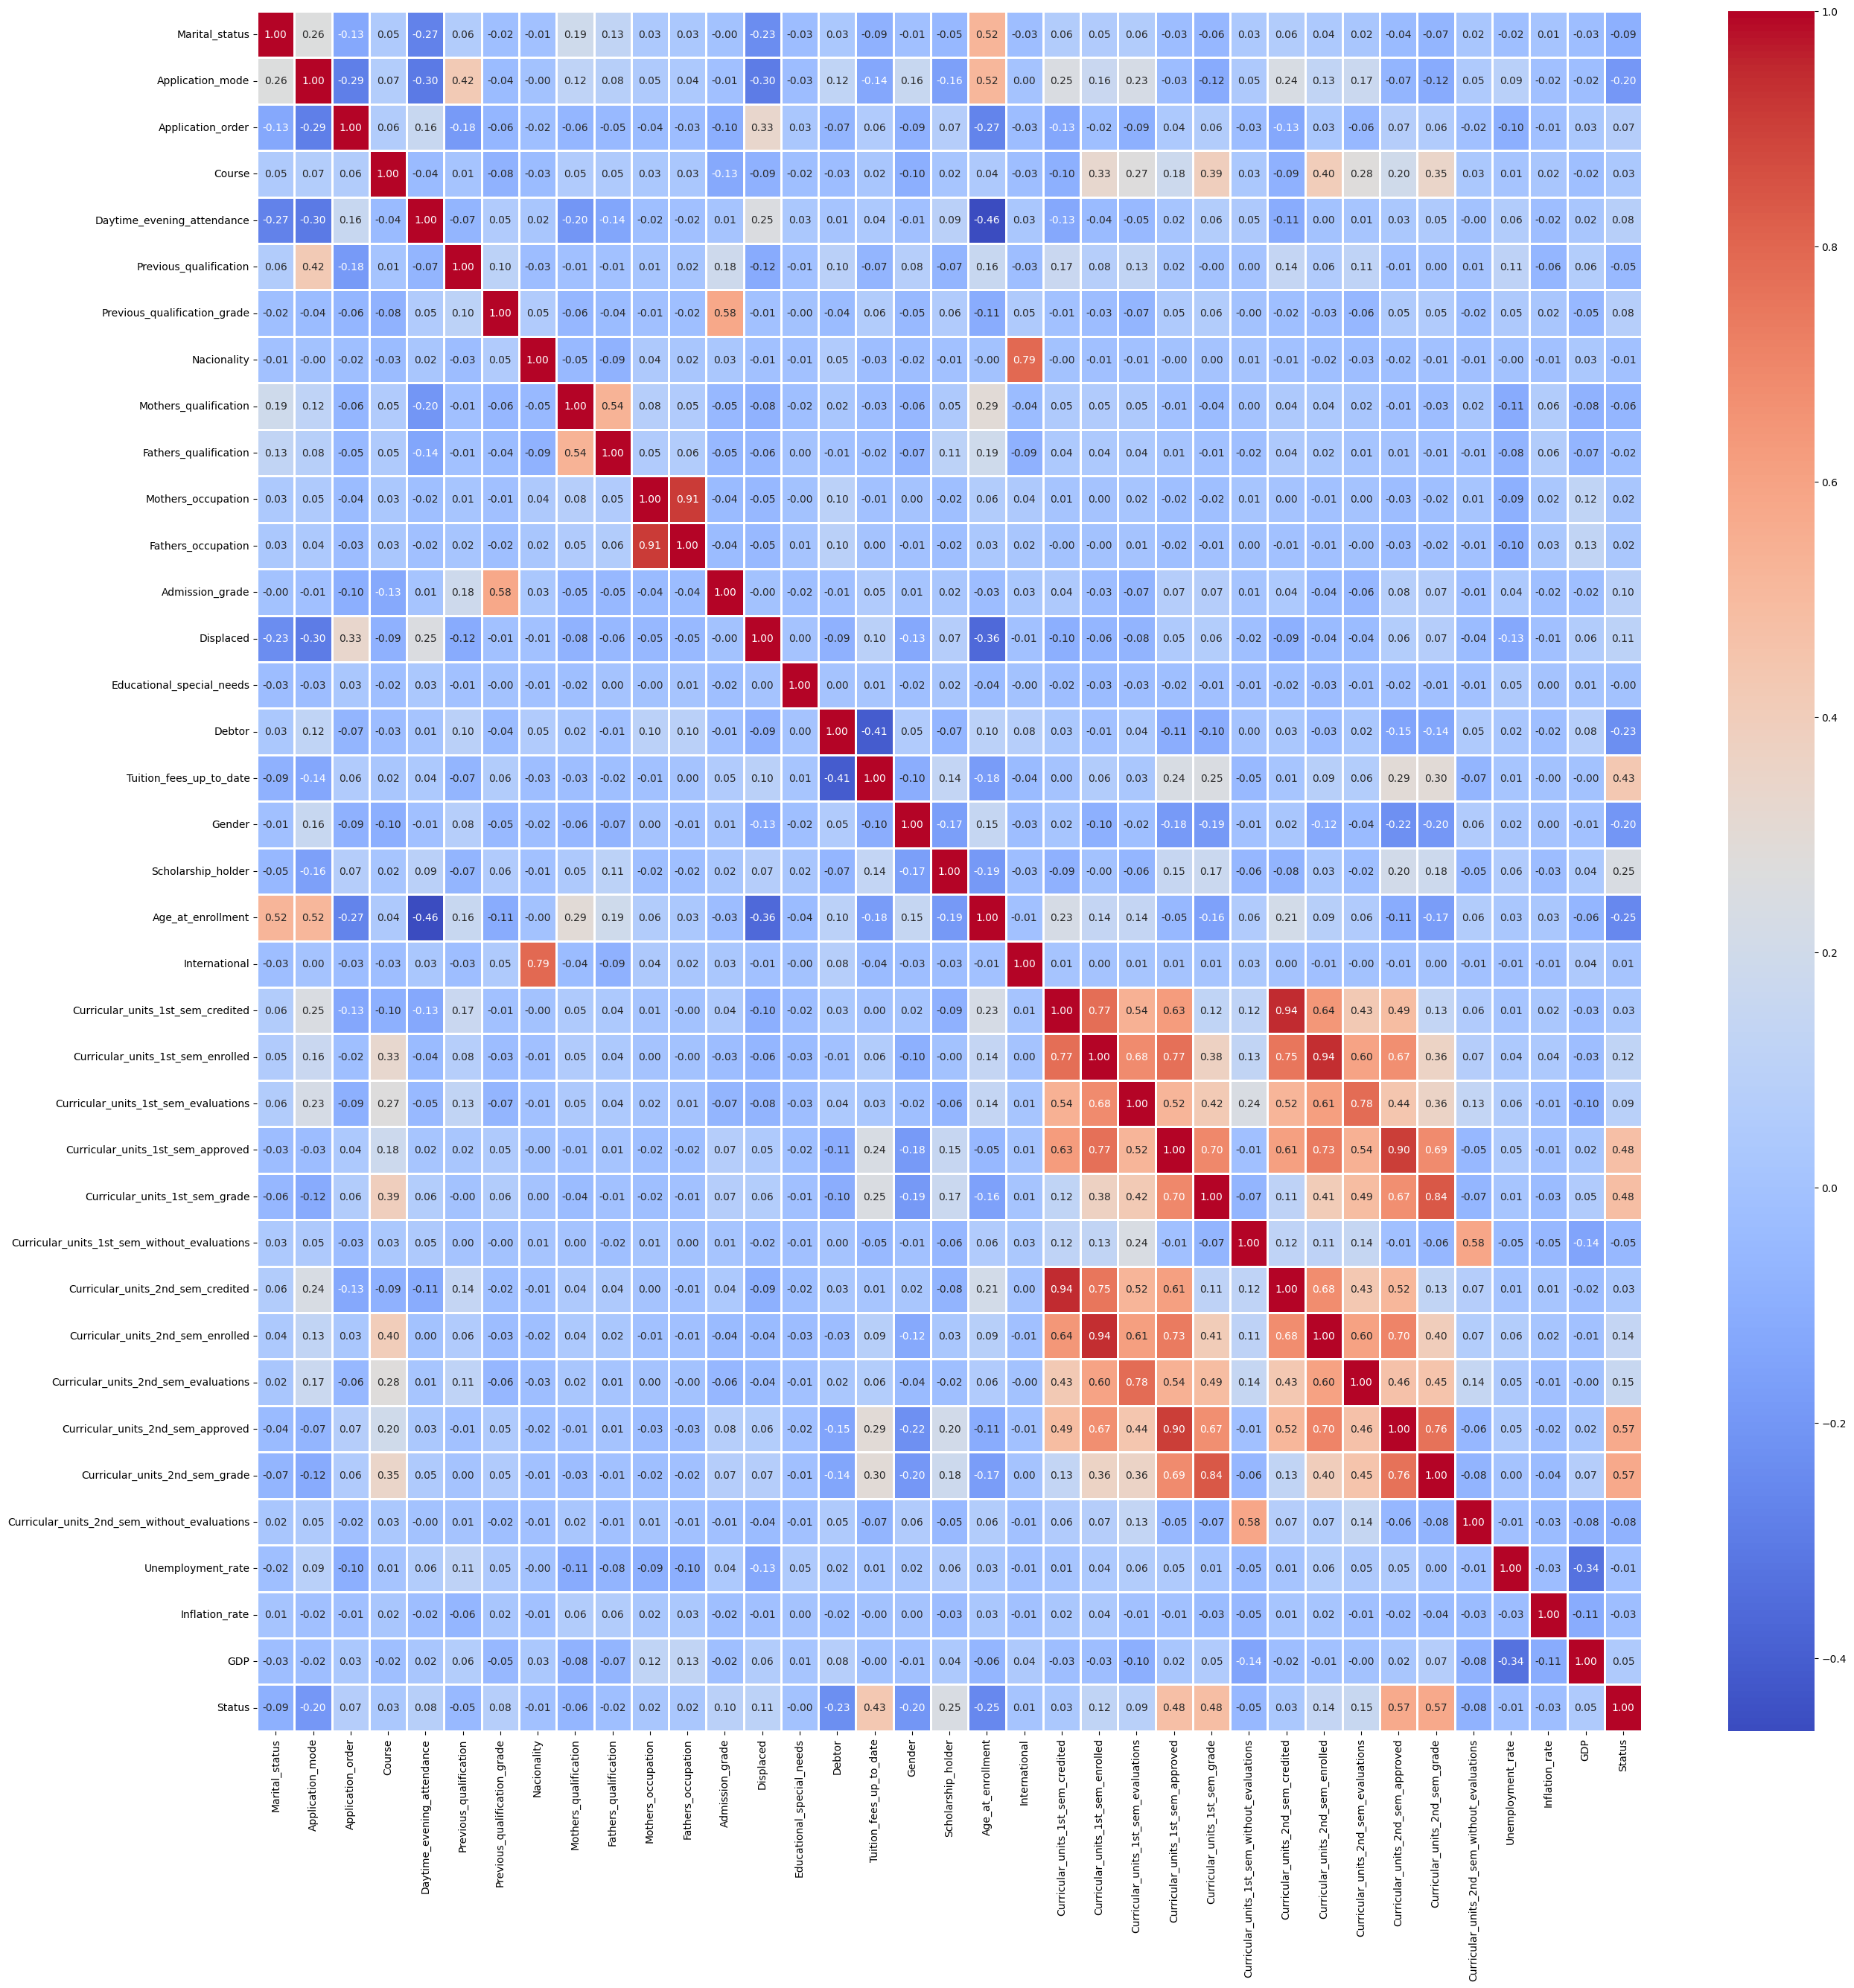

In [14]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.show()

In [15]:
treshold = 0.05
weak_corr = corr[abs(corr) < treshold].index
weak_corr = weak_corr.to_list()
weak_corr

['GDP',
 'Course',
 'Curricular_units_2nd_sem_credited',
 'Curricular_units_1st_sem_credited',
 'Fathers_occupation',
 'Mothers_occupation',
 'International',
 'Educational_special_needs',
 'Nacionality',
 'Unemployment_rate',
 'Fathers_qualification',
 'Inflation_rate',
 'Previous_qualification']

In [16]:
new_df = df.drop(weak_corr, axis=1)
new_df.head()

,Marital_status,Application_mode,Application_order,Daytime_evening_attendance,Previous_qualification_grade,Mothers_qualification,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,...,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
0,1,17,5,1,122.0,19,127.3,1,0,1,...,0,0,0.000000,0,0,0,0,0.000000,0,0
1,1,15,1,1,160.0,1,142.5,1,0,0,...,6,6,14.000000,0,6,6,6,13.666667,0,1
2,1,1,5,1,122.0,37,124.8,1,0,0,...,0,0,0.000000,0,6,0,0,0.000000,0,0
3,1,17,2,1,122.0,38,119.6,1,0,1,...,8,6,13.428571,0,6,10,5,12.400000,0,1
4,2,39,1,0,100.0,37,141.5,0,0,1,...,9,5,12.333333,0,6,6,6,13.000000,0,1


In [58]:
new_df.to_csv('data/cleaned_data.csv', index=False)

In [17]:
train_df, test_df = train_test_split(new_df, test_size=0.2, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print(train_df.shape)
print(test_df.shape)

(3539, 24)
(885, 24)


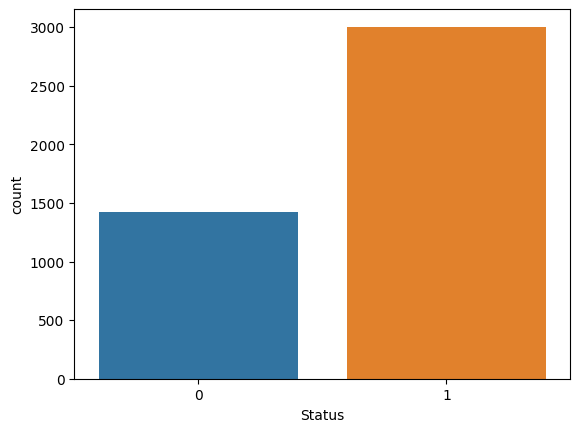

In [18]:
sns.countplot(data=new_df, x='Status')
plt.show()

In [19]:
new_df.Status.value_counts()

Status
1    3003
0    1421
Name: count, dtype: int64

In [20]:
df_majority = new_df[new_df.Status == 1]
df_minority = new_df[new_df.Status == 0]

In [21]:
df_majority_undersampled = resample(df_majority, n_samples=1421, random_state=42)
print(df_majority_undersampled.shape)

(1421, 24)


In [22]:
undersampled_train_df = pd.concat([df_minority, df_majority_undersampled]).reset_index(drop=True)
undersampled_train_df = shuffle(undersampled_train_df, random_state=42)
undersampled_train_df.reset_index(drop=True, inplace=True)
undersampled_train_df.sample(5)

,Marital_status,Application_mode,Application_order,Daytime_evening_attendance,Previous_qualification_grade,Mothers_qualification,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,...,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
1852,1,1,3,1,113.0,4,107.4,1,0,1,...,8,5,14.00,0,5,6,5,13.200000,0,1
2006,2,7,1,1,150.0,37,150.0,0,0,1,...,12,5,12.50,0,6,10,5,14.600000,0,1
1798,2,39,1,0,120.0,19,132.9,0,0,1,...,11,4,10.75,0,5,11,4,11.333333,0,0
2538,1,17,6,1,145.0,37,132.0,1,0,1,...,7,4,12.50,0,5,8,4,10.000000,1,1
192,1,17,1,1,127.0,1,129.8,0,0,0,...,10,0,0.00,0,5,10,0,0.000000,0,0


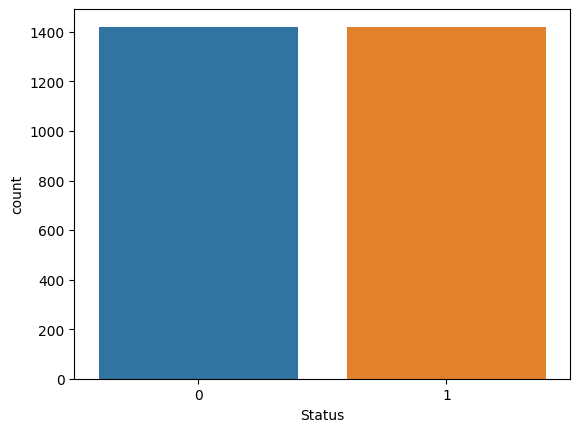

In [23]:
sns.countplot(data=undersampled_train_df, x='Status')
plt.show()

In [24]:
X_train = undersampled_train_df.drop('Status', axis=1)
y_train = undersampled_train_df['Status']

X_test = test_df.drop('Status', axis=1)
y_test = test_df['Status']

In [25]:
def scaling(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1, 1)
            scaler.fit(X)
            df['{}'.format(feature)] = scaler.transform(X)
            joblib.dump(scaler, './model/scaler_{}.joblib'.format(feature))

            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1, 1)
            df_test['{}'.format(feature)] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1, 1)
            scaler.fit(X)
            df['{}'.format(feature)] = scaler.transform(X)
            joblib.dump(scaler, './model/scaler_{}.joblib'.format(feature))
        return df

In [26]:
new_train_df, new_test_df = scaling(X_train.columns, X_train, X_test)

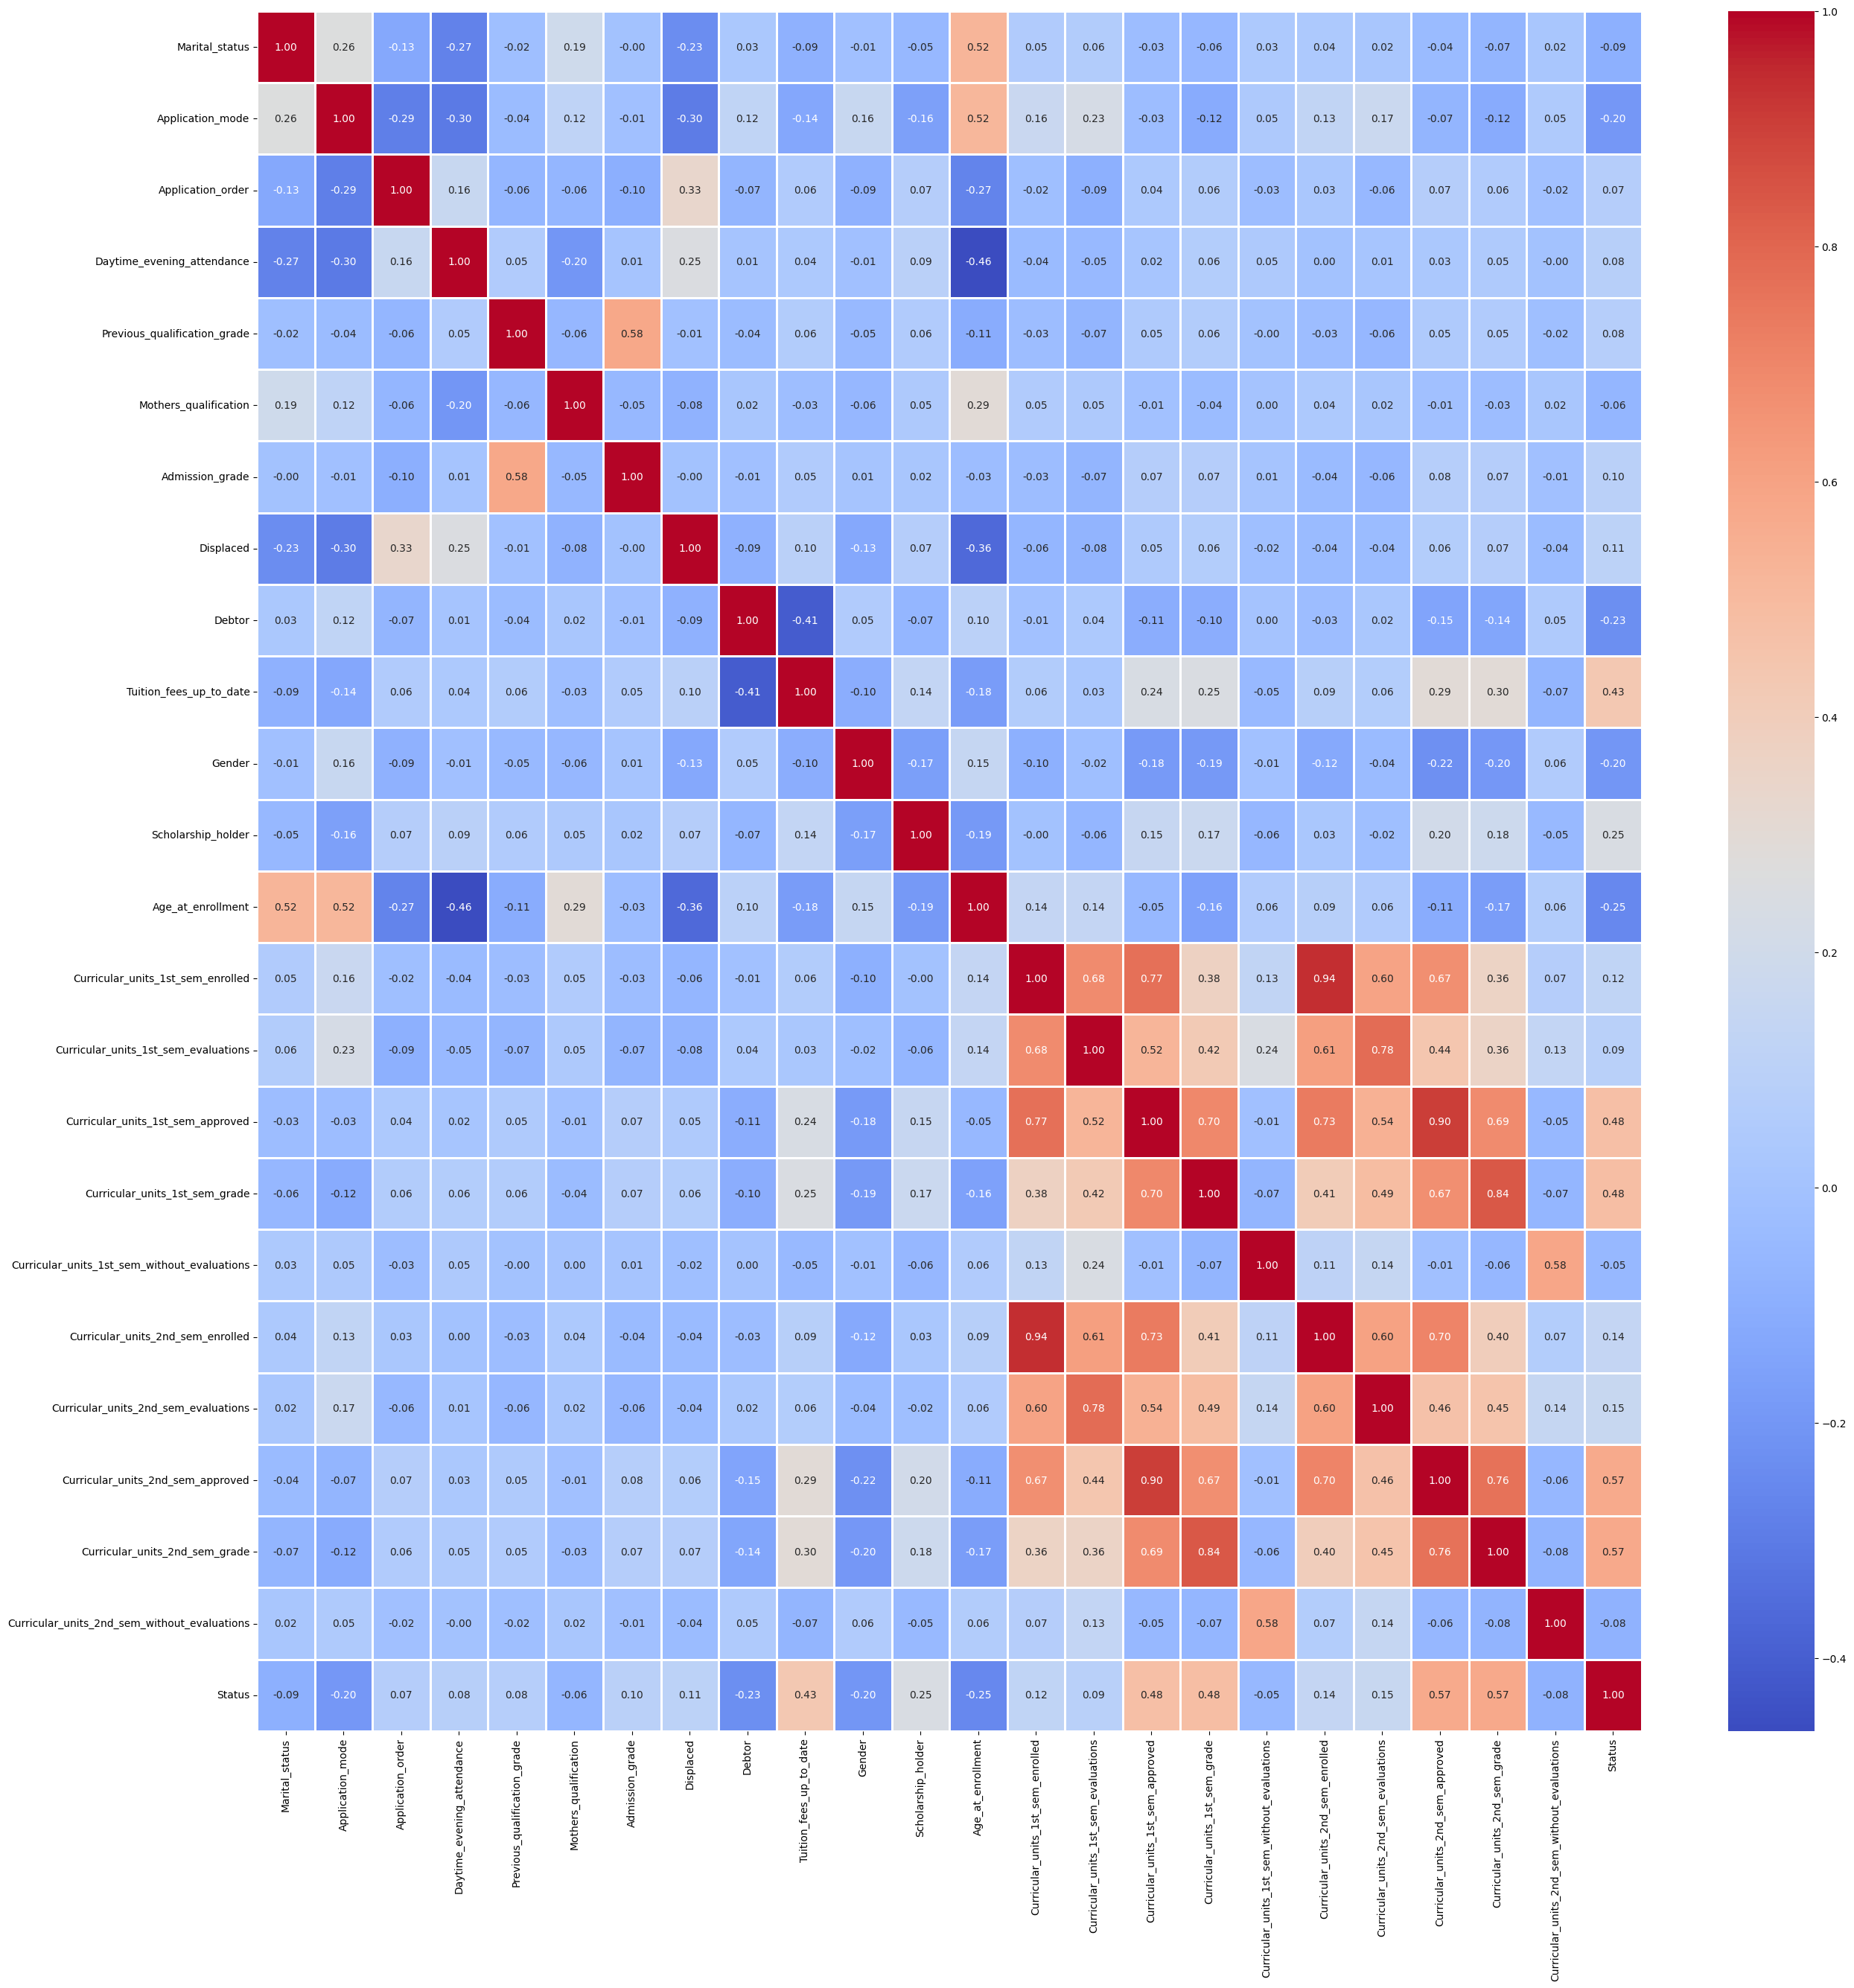

In [27]:
plt.figure(figsize=(30, 30))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.show()

In [28]:
correlation = new_df.corr()['Status'].sort_values(ascending=False).index.to_list()
correlation.remove('Status')

In [29]:
new_df.corr()['Status'].sort_values(ascending=False)

Status                                          1.000000
Curricular_units_2nd_sem_grade                  0.571792
Curricular_units_2nd_sem_approved               0.569500
Curricular_units_1st_sem_grade                  0.480669
Curricular_units_1st_sem_approved               0.479112
Tuition_fees_up_to_date                         0.429149
Scholarship_holder                              0.245354
Curricular_units_2nd_sem_evaluations            0.154999
Curricular_units_2nd_sem_enrolled               0.141515
Curricular_units_1st_sem_enrolled               0.124635
Displaced                                       0.107232
Admission_grade                                 0.095806
Curricular_units_1st_sem_evaluations            0.090125
Daytime_evening_attendance                      0.080499
Previous_qualification_grade                    0.078208
Application_order                               0.070485
Curricular_units_1st_sem_without_evaluations   -0.054230
Mothers_qualification          

In [30]:
pca_columns_1 = correlation[:15]
pca_columns_2 = correlation[15:]

In [31]:
train_pca_df = new_train_df.copy().reset_index(drop=True)
test_pca_df = new_test_df.copy().reset_index(drop=True)

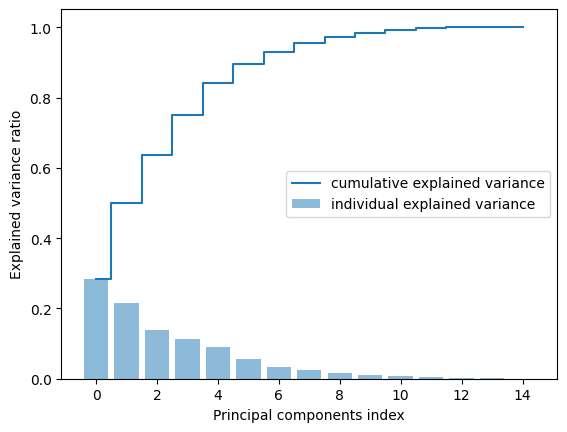

In [32]:
pca = PCA(n_components=len(pca_columns_1), random_state=123)
pca.fit(train_pca_df[pca_columns_1])
princ_comp = pca.transform(train_pca_df[pca_columns_1])

var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(len(pca_columns_1)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca_columns_1)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components index')
plt.legend(loc='best')
plt.show()

In [33]:
pca_1 = PCA(n_components=10, random_state=123)
pca_1.fit(train_pca_df[pca_columns_1])
joblib.dump(pca_1, './model/pca_1.joblib')
princ_comp_1 = pca_1.transform(train_pca_df[pca_columns_1])
train_pca_df[['pc1_1', 'pc1_2', 'pc1_3', 'pc1_4', 'pc1_5', 'pc1_6', 'pc1_7', 'pc1_8', 'pc1_9', 'pc1_10']] = pd.DataFrame(princ_comp_1, columns=['pc1_1', 'pc1_2', 'pc1_3', 'pc1_4', 'pc1_5', 'pc1_6', 'pc1_7', 'pc1_8', 'pc1_9', 'pc1_10'])
train_pca_df.drop(columns=pca_columns_1, axis=1, inplace=True)
train_pca_df.head()

,Marital_status,Application_mode,Mothers_qualification,Debtor,Gender,Age_at_enrollment,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_without_evaluations,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5,pc1_6,pc1_7,pc1_8,pc1_9,pc1_10
0,0.0,0.000000,0.000000,0.0,1.0,0.019231,0.0,0.0,-0.336542,0.552838,0.944627,-0.374919,0.079125,-0.024804,-0.258240,0.078422,-0.018180,0.070671
1,0.0,0.285714,0.000000,0.0,0.0,0.038462,0.0,0.0,-0.539612,0.187241,-0.351688,-0.019258,-0.050539,0.372431,-0.091022,-0.072730,0.069946,0.053505
2,0.0,0.285714,0.767442,0.0,0.0,0.153846,0.0,0.0,-0.198730,0.044339,-0.426853,-0.099230,0.950414,-0.095464,-0.242320,-0.006513,0.133364,0.121022
3,0.0,0.678571,0.837209,0.0,1.0,0.423077,0.0,0.0,0.971062,0.146019,0.120252,-0.617553,0.686553,0.072821,0.023066,-0.020450,-0.114658,-0.123440
4,0.0,0.678571,0.000000,0.0,1.0,0.153846,0.0,0.0,0.725478,0.179352,0.146633,-0.512824,-0.291247,-0.127900,0.373033,0.374154,0.012509,0.141112


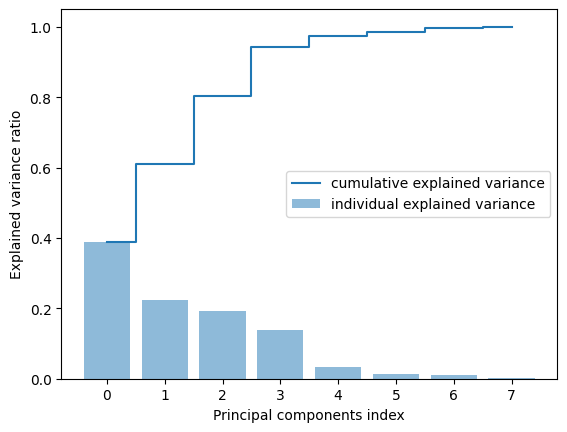

In [34]:
pca = PCA(n_components=len(pca_columns_2), random_state=123)
pca.fit(train_pca_df[pca_columns_2])
princ_comp = pca.transform(train_pca_df[pca_columns_2])

var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(len(pca_columns_2)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca_columns_2)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components index')
plt.legend(loc='best')
plt.show()

In [35]:
pca_2 = PCA(n_components=6, random_state=123)
pca_2.fit(train_pca_df[pca_columns_2])
joblib.dump(pca_2, './model/pca_2.joblib')
princ_comp_2 = pca_2.transform(train_pca_df[pca_columns_2])
train_pca_df[['pc2_1', 'pc2_2', 'pc2_3', 'pc2_4', 'pc2_5', 'pc2_6']] = pd.DataFrame(princ_comp_2, columns=['pc2_1', 'pc2_2', 'pc2_3', 'pc2_4', 'pc2_5', 'pc2_6'])
train_pca_df.drop(columns=pca_columns_2, axis=1, inplace=True)
train_pca_df.head()

,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5,pc1_6,pc1_7,pc1_8,pc1_9,pc1_10,pc2_1,pc2_2,pc2_3,pc2_4,pc2_5,pc2_6
0,-0.336542,0.552838,0.944627,-0.374919,0.079125,-0.024804,-0.258240,0.078422,-0.018180,0.070671,0.544552,-0.606246,-0.101529,-0.205984,0.057794,0.012621
1,-0.539612,0.187241,-0.351688,-0.019258,-0.050539,0.372431,-0.091022,-0.072730,0.069946,0.053505,-0.367576,-0.437090,0.069566,0.226452,-0.010583,-0.007628
2,-0.198730,0.044339,-0.426853,-0.099230,0.950414,-0.095464,-0.242320,-0.006513,0.133364,0.121022,-0.424673,0.234082,-0.192432,-0.051156,-0.017553,-0.058907
3,0.971062,0.146019,0.120252,-0.617553,0.686553,0.072821,0.023066,-0.020450,-0.114658,-0.123440,0.636555,0.463765,-0.301604,0.104296,0.042946,-0.168941
4,0.725478,0.179352,0.146633,-0.512824,-0.291247,-0.127900,0.373033,0.374154,0.012509,0.141112,0.688746,-0.298567,-0.016520,0.380585,-0.046385,-0.018386


In [36]:
test_princ_comp_1 = pca_1.transform(test_pca_df[pca_columns_1])
test_pca_df[['pc1_1', 'pc1_2', 'pc1_3', 'pc1_4', 'pc1_5', 'pc1_6', 'pc1_7', 'pc1_8', 'pc1_9', 'pc1_10']] = pd.DataFrame(test_princ_comp_1, columns=['pc1_1', 'pc1_2', 'pc1_3', 'pc1_4', 'pc1_5', 'pc1_6', 'pc1_7', 'pc1_8', 'pc1_9', 'pc1_10'])
test_pca_df.drop(columns=pca_columns_1, axis=1, inplace=True)

test_princ_comp_2 = pca_2.transform(test_pca_df[pca_columns_2])
test_pca_df[['pc2_1', 'pc2_2', 'pc2_3', 'pc2_4', 'pc2_5', 'pc2_6']] = pd.DataFrame(test_princ_comp_2, columns=['pc2_1', 'pc2_2', 'pc2_3', 'pc2_4', 'pc2_5', 'pc2_6'])
test_pca_df.drop(columns=pca_columns_2, axis=1, inplace=True)

test_pca_df.head()

,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5,pc1_6,pc1_7,pc1_8,pc1_9,pc1_10,pc2_1,pc2_2,pc2_3,pc2_4,pc2_5,pc2_6
0,-0.500790,0.213739,0.743930,-0.178637,0.101125,-0.242065,-0.284501,0.080100,-0.171618,0.522506,-0.278620,-0.131280,0.106436,0.628962,0.401209,0.336065
1,0.307308,-0.442763,-0.215608,-0.111159,-0.254858,-0.036902,-0.081046,-0.104125,-0.077902,-0.038972,-0.376214,-0.386367,0.045498,0.192147,-0.044316,0.020018
2,-0.044118,-0.779508,0.649792,-0.009303,-0.138171,-0.068342,-0.014407,0.016330,-0.063047,-0.098447,-0.359545,0.528823,0.696368,-0.402030,-0.142140,0.052100
3,-0.503918,0.107404,-0.370390,-0.004709,-0.016595,0.003297,-0.182761,-0.180133,-0.013019,-0.085284,0.601273,-0.488615,-0.066025,0.030493,-0.024396,0.036974
4,-0.021343,0.731186,-0.019660,-0.378753,-0.025226,-0.210114,-0.390368,0.256483,0.080529,0.272349,-0.351256,0.458679,-0.167388,0.250381,-0.125288,-0.035852


## Modeling

In [37]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}

log_model = LogisticRegression(random_state=123)

CV_lr = GridSearchCV(estimator=log_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_lr.fit(train_pca_df, y_train)

c:\Users\ghifarullah19\anaconda3\envs\jaya_jaya_institute\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ghifarullah19\anaconda3\envs\jaya_jaya_institute\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ghifarullah19\anaconda3\envs\jaya_jaya_institute\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\ghifarullah19\anaconda3\

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=123), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [38]:
print('Best parameters for Logistic Regression: ', CV_lr.best_params_)

Best parameters for Logistic Regression:  {'C': 1, 'penalty': 'l2'}


In [39]:
log_model = LogisticRegression(C=CV_lr.best_params_['C'], penalty=CV_lr.best_params_['penalty'], random_state=123)
log_model.fit(train_pca_df, y_train)
joblib.dump(log_model, './model/log_model.joblib')

['./model/log_model.joblib']

In [40]:
param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

tree_model = DecisionTreeClassifier(random_state=123)
CV_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_tree.fit(train_pca_df, y_train)

c:\Users\ghifarullah19\anaconda3\envs\jaya_jaya_institute\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [41]:
print('Best parameters for Decision Tree: ', CV_tree.best_params_)

Best parameters for Decision Tree:  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto'}


In [42]:
tree_model = DecisionTreeClassifier(
    random_state=123,
    criterion=CV_tree.best_params_['criterion'],
    max_depth=CV_tree.best_params_['max_depth'],
    max_features=CV_tree.best_params_['max_features']
)

tree_model.fit(train_pca_df, y_train)
joblib.dump(tree_model, './model/tree_model.joblib')

c:\Users\ghifarullah19\anaconda3\envs\jaya_jaya_institute\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


['./model/tree_model.joblib']

In [43]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [5, 6, 7, 8],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

forest_model = RandomForestClassifier(random_state=123)

CV_forest = GridSearchCV(estimator=forest_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_forest.fit(train_pca_df, y_train)

c:\Users\ghifarullah19\anaconda3\envs\jaya_jaya_institute\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400]})

In [44]:
print('Best parameters for Random Forest: ', CV_forest.best_params_)

Best parameters for Random Forest:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 400}


In [45]:
forest_model = RandomForestClassifier(
    random_state=123,
    criterion=CV_forest.best_params_['criterion'],
    max_depth=CV_forest.best_params_['max_depth'],
    max_features=CV_forest.best_params_['max_features'],
    n_estimators=CV_forest.best_params_['n_estimators']
)

forest_model.fit(train_pca_df, y_train)
joblib.dump(forest_model, './model/forest_model.joblib')

c:\Users\ghifarullah19\anaconda3\envs\jaya_jaya_institute\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


['./model/forest_model.joblib']

In [46]:
param_grid = {
    'max_depth': [5, 6, 7, 8],
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.1, 1],
    'max_features': ['auto', 'sqrt', 'log2']
}

gboost_model = GradientBoostingClassifier(random_state=123)

CV_gboost = GridSearchCV(estimator=gboost_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_gboost.fit(train_pca_df, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400]})

In [47]:
print('best parameters: ', CV_gboost.best_params_)

best parameters:  {'learning_rate': 0.01, 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 400}


In [48]:
gboost_model = GradientBoostingClassifier(
    random_state=123,
    max_depth=CV_gboost.best_params_['max_depth'],
    n_estimators=CV_gboost.best_params_['n_estimators'],
    max_features=CV_gboost.best_params_['max_features'],
    learning_rate=CV_gboost.best_params_['learning_rate'],
)

gboost_model.fit(train_pca_df, y_train)
joblib.dump(gboost_model, './model/gboost_model.joblib')

['./model/gboost_model.joblib']

## Evaluation

In [53]:
def evaluating(y_pred, y_true):
    labels = [0, 1]

    print(classification_report(y_true, y_pred))
    cnf_matrix = confusion_matrix(y_true, y_pred, labels=labels)

    sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='coolwarm', annot_kws={'size': 14})
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()

    return cnf_matrix

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       316
           1       0.87      0.88      0.88       569

    accuracy                           0.84       885
   macro avg       0.83      0.83      0.83       885
weighted avg       0.84      0.84      0.84       885



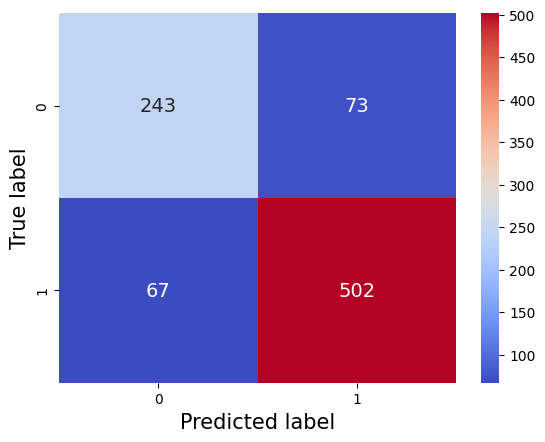

array([[243,  73],
       [ 67, 502]], dtype=int64)

In [57]:
y_pred_test = log_model.predict(test_pca_df)
evaluating(y_pred_test, y_test)

              precision    recall  f1-score   support

           0       0.81      0.71      0.76       316
           1       0.85      0.91      0.88       569

    accuracy                           0.84       885
   macro avg       0.83      0.81      0.82       885
weighted avg       0.84      0.84      0.83       885



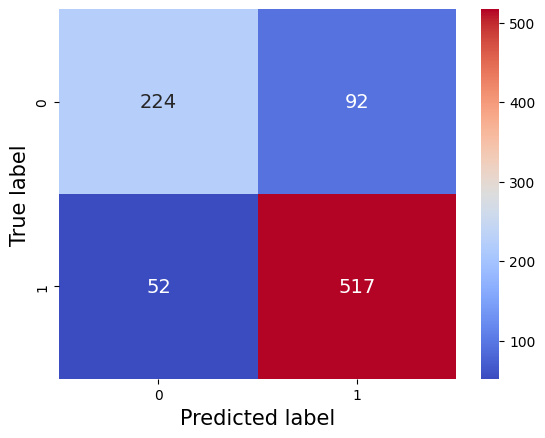

array([[224,  92],
       [ 52, 517]], dtype=int64)

In [54]:
y_pred_test = tree_model.predict(test_pca_df)
evaluating(y_pred_test, y_test)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       316
           1       0.91      0.93      0.92       569

    accuracy                           0.90       885
   macro avg       0.89      0.88      0.89       885
weighted avg       0.90      0.90      0.90       885



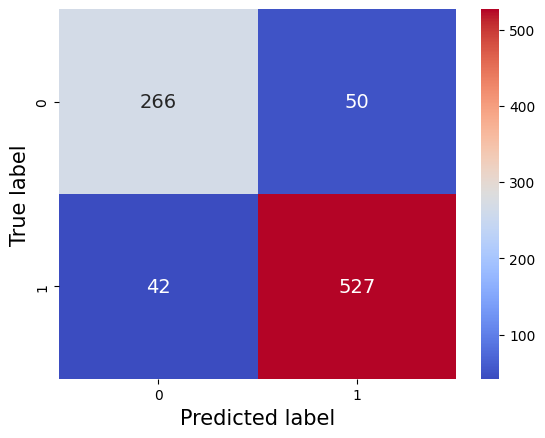

array([[266,  50],
       [ 42, 527]], dtype=int64)

In [55]:
y_pred_test = forest_model.predict(test_pca_df)
evaluating(y_pred_test, y_test)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       316
           1       0.95      0.92      0.93       569

    accuracy                           0.92       885
   macro avg       0.91      0.92      0.91       885
weighted avg       0.92      0.92      0.92       885



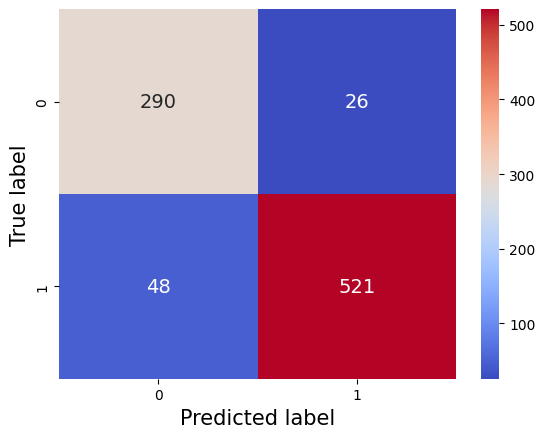

array([[290,  26],
       [ 48, 521]], dtype=int64)

In [56]:
y_pred_test = gboost_model.predict(test_pca_df)
evaluating(y_pred_test, y_test)

In [59]:
pca_columns_1

['Curricular_units_2nd_sem_grade',
 'Curricular_units_2nd_sem_approved',
 'Curricular_units_1st_sem_grade',
 'Curricular_units_1st_sem_approved',
 'Tuition_fees_up_to_date',
 'Scholarship_holder',
 'Curricular_units_2nd_sem_evaluations',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_1st_sem_enrolled',
 'Displaced',
 'Admission_grade',
 'Curricular_units_1st_sem_evaluations',
 'Daytime_evening_attendance',
 'Previous_qualification_grade',
 'Application_order']

In [60]:
pca_columns_2

['Curricular_units_1st_sem_without_evaluations',
 'Mothers_qualification',
 'Curricular_units_2nd_sem_without_evaluations',
 'Marital_status',
 'Application_mode',
 'Gender',
 'Debtor',
 'Age_at_enrollment']

In [64]:
df[pca_columns_1 + pca_columns_2].sample(1).to_csv('data/test.csv', index=False)